# COGS 108 - Final Project 

# Overview

The main goal of our project was to identify a correlation, if any, between Airbnb housing pricing and nearby restaurant quality, indicated by the inspection scores, in San Francisco. 

We created visualizations that allowed us to indirectly identify the relationship between pricing and scores and used a linear regression model to examine the correlation between the two stated variables and other factors that may impact Airbnb pricing (e.g. latitude of Airbnb, room type).

Overall, we did not find a significant correlation between Airbnb pricing and restaurants’ inspection score in San Francisco. This might happen because Airbnb pricing takes into account a combination of various factors (e.g. room type, reviews, nearby crime rate, target market of Airbnb owner, and even some subjective factors according to owner’s will) that impact the final price.


# Names

- Lian Lumada
- Emilio Marquez-Fernandez
- Haimei Yu
- Hanbyul Ryu
- Tianye Fan

# Research Question

Are Airbnb's daily rates affected by nearby restaurant quality in San Francisco? If so, to what degree are San Francisco's Airbnb daily rates affected by nearby restaurant quality? 

What does this finding say about San Francisco Airbnb users and Airbnb prices in general? 

## Background and Prior Work

Airbnb is becoming an increasingly popular housing option for those who travel and has revolutionized the rental economy. For those who choose to list their living space on Airbnb, they have the option of setting the price for it either manually (with a recommended Airbnb listing price based on various factors) or automatically with ‘Smart Pricing.’ Smart Pricing allows Airbnb to automatically change an Airbnb’s listing’s price, with a minimum and maximum price limit set by the owner of the Airbnb listing, based on the type and location of listing, the season, demand, etc.

With the addition of Airbnb Smart Pricing, there is even more ambiguity with how Airbnb prices are set both by the Airbnb user and the Airbnb algorithm that decides the final price when Smart Pricing is turned on. 
This article posted by Airbnb identified that Airbnb guests spent, at least, 25 billion dollars in total on nearby restaurants in 2018. This finding suggests restaurants nearby are important for Airbnb users. 

One of the factors, out of many, that should have an effect on the change in an Airbnb’s daily rate, through smart pricing, is the inspection score of a nearby restaurant. Research of Airbnb guest ratings indicates that one factor that contributes to a specific guest rating score is: how the guest(s) felt about the location of Airbnb (i.e. availability of nearby shopping centers or restaurants that satisfy an Airbnb guest's expectations). Additionally, the guest rating score of an Airbnb can impact the overall price of a listing. Therefore, restaurant inspection scores should have an effect on Airbnb daily rates but not by a marginal amount.

References (include links):
- 1) https://news.airbnb.com/airbnb-guests-spent-at-least-us25-billion-at-restaurants-and-cafes-in-2018/  
- 2) https://www.airbnb.com/help/article/1257/how-do-star-ratings-work-for-stays
- 3) http://www.fmaconferences.org/HongKong/Papers/Consumer_Search_and_Seller_Reliability_on_Airbnb.pdf
- 4) https://www.airbnb.com/help/article/1168/how-do-i-turn-smart-pricing-on-or-off


# Hypothesis


The average inspection score of restaurants within a 3-kilometers circle of a certain Airbnb will be positively correlated to the daily rate of stated airbnb. 

We present this hypothesis as a result of our background research revealing the major influence that restaurants near an Airbnb listing are having on the global Airbnb market. 


# Dataset(s)

Dataset I: 
- Dataset Name: listings.csv (San Francisco Airbnb dataset) 
- Link to the dataset: http://insideairbnb.com/get-the-data.html
- Number of observations: 8533
- Description of Dataset:
The SF Airbnb listings dataset contains most, but not all, Airbnb listings in SF that were on Airbnb.com on February 12, 2020. Each observation(row) is an Airbnb housing and each column represents a feature. The raw dataset has 8533 rows with 16 features, including 'name','host_name','host_id','neighbourhood_group','last_review','reviews_per_month', 'id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count','availability_365'. 


Dataset II: 
- Dataset Name: Restaurants (SF CA Restaurant dataset) 
- Link to the dataset: https://data.sfgov.org/Health-and-Social-Services/Restaurant-Scores-LIVES-Standard/pyih-qa8i
- Number of observations: 53973
- Description of Dataset:
This SF restaurant dataset contains information based on SF Health department restaurant inspection reports and scoring for these restaurants. Each row represents a restaurants, and there are 17 features(columns), which are 'business_name','business_postal_code','business_location','violation_description','business_phone_number', 'inspection_type','violation_id','risk_category','Neighborhoods (old)','Police Districts', 'Supervisor Districts', 'Fire Prevention Districts', 'Zip Codes', 'Analysis Neighborhoods','business_state','inspection_id','inspection_date', 'inspection_score'(out of 100), 'business_id', 'business_longitude', 'business_latitude'. 




For this project, we will mainly focus on the correlation between 'price' from the Airbnb dataset and 'inspection_score' from the restaurant dataset. We will use latitude and longitude to match them up, detailed steps are explained at later sections. 

# Setup

In [1]:
## This cell includes all the packages that we will be using
#for data analysis and cleansing 
import folium
import sklearn
import csv
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from statsmodels.formula.api import ols
from math import sin, cos, sqrt, atan2, radians
from sklearn import preprocessing
from statsmodels.formula.api import ols

#for visualization 
import matplotlib.pyplot as plt
from random import randint
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from folium.plugins import HeatMap
from scipy.stats import ttest_ind, chisquare, normaltest
from IPython.display import HTML
# Note: the statsmodels import may print out a 'FutureWarning'. Thats fine.

# Data Cleaning

** Both dataset are csv files. So they are easy to work with on python. We can use them directly. 
Data cleaning steps:

Part I: restaurant dataset: 
    1. We will load raw restaurant dataset. 
    2. We will remove the columns with private information, such as business name, phone number.
    3. We will remove unrelated or useless columns for this analysis, such as inspection_type, violation_id.
    4. We will group rows with same restaurants id and take the average of the inspection scores. 
    5. Since some restaurants do not have latitude and longitude information, we will convert their addresses to latitude and longitude coordinates to make this dataset parallel with the second dataset from Airbnb.

Part II: Airbnb dataset: 
    1. We will load raw dataset from Aribnb. 
    2. Will remove columns with private information and unrelated data. 

## Part I: Restaurant dataset 


First, we will load the csv file "Restaurants.csv", which is the raw dataset of restaurants at San Francisco.

In [2]:
## This cell loads the restaurant dataset that we will be using for analysis
df_restaurants_raw = pd.read_csv('Restaurants.csv')
df_restaurants_raw.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,NaN,NaN,NaN,NaN,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,NaN,NaN,NaN,1.415488e+10,...,New Construction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_restaurants_raw.describe()

,business_id,business_latitude,business_longitude,business_phone_number,inspection_score,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
count,53973.000000,27475.000000,27475.000000,1.767200e+04,39541.000000,27447.000000,27447.000000,27447.000000,27405.000000,27460.000000,27447.000000
mean,55218.877883,37.750969,-122.360157,1.415541e+10,86.221669,18.937990,4.810653,7.067512,7.461814,19974.613838,19.459868
std,36165.556449,0.882643,2.859985,1.356438e+06,8.489218,11.818465,2.954345,3.149427,4.469203,13340.267760,11.615126
min,19.000000,0.000000,-122.510896,1.415020e+10,45.000000,1.000000,1.000000,1.000000,1.000000,54.000000,1.000000
25%,7558.000000,37.756133,-122.437069,1.415537e+10,81.000000,6.000000,2.000000,5.000000,3.000000,308.000000,8.000000
50%,69186.000000,37.780133,-122.419107,1.415561e+10,87.000000,19.000000,4.000000,8.000000,8.000000,28855.000000,20.000000
75%,86385.000000,37.788864,-122.407417,1.415580e+10,92.000000,28.000000,8.000000,10.000000,11.000000,28859.000000,30.000000
max,102705.000000,37.824494,0.000000,1.415988e+10,100.000000,41.000000,10.000000,11.000000,15.000000,29492.000000,41.000000


As shown above, the raw dataset has  rows and  columns, and many columns need to be removed. 
We will remove the following columns: 

    business_name and business_phone_number because they involves private information;
    
    business_postal_code, business_location, Neighborhoods (old), Zip Codes, Analysis Neighborhoods, business_state, Police Districts, Supervisor Districts, Fire Prevention Districts, inspection_id, and inspection_date because they have too many nans and they are not that much useful for our analysis hypothesis;
    
    violation_desciption, inspection_type, violation_id, and risk_category because they are not much related and we are not focusing this project on text analysis; 

In [4]:
#drop the columns that are not useful for this current analysis
df_restaurants_raw = df_restaurants_raw.drop(columns = ['business_name','business_postal_code','business_location','violation_description','business_phone_number', \
                                                 'inspection_type','violation_id','risk_category','Neighborhoods (old)',\
                                                'Police Districts', 'Supervisor Districts', 'Fire Prevention Districts', 'Zip Codes', 'Analysis Neighborhoods','business_state',\
                                                'inspection_id','inspection_date'])
df_restaurants_raw.describe()

,business_id,business_latitude,business_longitude,inspection_score
count,53973.000000,27475.000000,27475.000000,39541.000000
mean,55218.877883,37.750969,-122.360157,86.221669
std,36165.556449,0.882643,2.859985,8.489218
min,19.000000,0.000000,-122.510896,45.000000
25%,7558.000000,37.756133,-122.437069,81.000000
50%,69186.000000,37.780133,-122.419107,87.000000
75%,86385.000000,37.788864,-122.407417,92.000000
max,102705.000000,37.824494,0.000000,100.000000


As shown above, the dataset now has rows and columns. Some restaurants were repeated for several times as they did several times of inspection. So we will group the same restaurants together by taking average of the inspection scores. 

In [5]:
#group same restaurants by taking average of inspection score 
df_restaurants_numerical = df_restaurants_raw.groupby(['business_id']).mean()
df_restaurants_Categorical = df_restaurants_raw.groupby(['business_id']).first()
df_restaurants_Categorical['inspection_score'] = df_restaurants_numerical['inspection_score']
#print the datafram description
df_restaurants = df_restaurants_Categorical
df_restaurants.head()

,business_address,business_city,business_latitude,business_longitude,inspection_score
business_id,,,,,
19,"1200 Van Ness Ave, 3rd Floor",San Francisco,37.786848,-122.421547,94.666667
24,"500 California St, 2nd Floor",San Francisco,37.792888,-122.403135,98.000000
31,2801 Leavenworth St,San Francisco,37.807155,-122.419004,95.000000
45,3202 FOLSOM St,San Francisco,37.747114,-122.413641,88.000000
48,747 IRVING St,San Francisco,37.764013,-122.465749,89.800000


As shown above, now our dataset has rows and columns.  But not every restaurant has the values for latitude and longitude. Since this information is important for further analysis as we need to match restaurants dataset with the Airbnb dataset, we will now write some code to get latitude and longitude from exact address (and remove address column after this step to avoide privacy issues). 
This part takes too long to run. So we saved the processed dataset and commented it out. If you want to check this part, please just uncomment it. 

In [6]:
# # df_inspection = pd.read_csv('Restaurant_Scores.csv')
# # df_inspection.shape
# # df_inspection = df_inspection.drop(["business_name", "business_phone_number", "inspection_type", "violation_id"], axis=1)
# # df_inspection
# # # install and import packages from geopy and geopandas 
# # pip install geopy
# # pip install geopandas
# import geopy
# import geopandas
# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter
# locator = Nominatim(user_agent="myGeocoder")
# geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# #filter out the ones with Nan Latitude and Longitude 
# df_need_locations = df_restaurants[df_restaurants['business_longitude'].isna() | df_restaurants['business_latitude'].isna() ]
# df_need_locations.shape
# locator = Nominatim(user_agent="myGeocoder")
# #get the raws that already have latitude and longitude 
# filtered_df_restaurants = df_restaurants[df_restaurants['business_longitude'].notnull() & df_restaurants['business_latitude'].notnull() ]
# filtered_df_restaurants.shape
# #Since the address column does not contain the city name, so we need to append "San Francisco" to each row after the address 
# cities = df_need_locations["business_city"].copy();
# try:
#     df_need_locations["business_address"]= df_need_locations["business_address"].str.cat(cities, sep =", ") 
# except:
#     pass
# #Then apply the function geocode only to dataframe containing the retaurants that need coordinate information
# df_need_locations['location'] = df_need_locations['business_address'].apply(geocode)
# df_need_locations['point'] = df_need_locations['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# df_need_locations[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_need_locations['point'].tolist(), index=df_need_locations.index)
# df_need_locations.business_latitude = df_need_locations.latitude
# df_need_locations.business_longitude = df_need_locations.longitude
# #save this dataframe after processing 
# df_need_locations.to_csv('df_need_locations.csv')
# #check how many rows still do not have coordinate information 
# #This rows either do not have clear addresses or have addresses that are not recorded formally. So we will abandon these rows. 
# #Since they are a small portion of the dataset and would not bring much bias. 
# coordinate_na = df_need_locations[df_need_locations['business_longitude'].isna() | df_need_locations['business_latitude'].isna()]
# coordinate_na.shape
# #extract the rows that has successfully attained coordinates 
# processed_df_need_locations = df_need_locations[df_need_locations['business_longitude'].notnull() & df_need_locations['business_latitude'].notnull() ]
# #drop useless columns 
# processed_df_need_locations = processed_df_need_locations.drop(["location", "point","latitude","longitude", "altitude"], axis=1) 
# #combine the rows with converted coordinates with the rows that have existed coordinates and save them into "processed.csv"
# df_ = [filtered_df_restaurants, processed_df_need_locations]
# df_ = pd.concat(df_)
# df_.to_csv('restaurants_cleaned.csv')
# #check dataset size 
# df_.shape

Now let's take a look at the processed dataset. A few addresses were not converted successfully either because their address is not clear or they do not have an inspection score. We will remove these observations because there are only a few and this issue happens to the restaurants randomly. This would not bring us much bias. 

In [7]:
df_=pd.read_csv('restaurants_cleaned.csv');
df_restaurants = df_.dropna()
df_restaurants.describe()

,business_id,business_latitude,business_longitude,inspection_score
count,4985.000000,4985.000000,4985.000000,4985.000000
mean,52811.224875,37.584179,-122.031770,89.547289
std,36485.533616,3.297350,7.031572,7.164113
min,19.000000,-46.444581,-122.510896,54.000000
25%,6030.000000,37.760526,-122.435670,85.250000
50%,66896.000000,37.780148,-122.418631,90.428571
75%,85694.000000,37.789457,-122.406555,94.833333
max,102398.000000,37.824524,121.063096,100.000000


Now, df_restaurants is now a cleaned dataframe that we will use for futher analysis. 

## Part II: Airbnb dataset 

For the Airbnb dataset, we will do something similar first. We load the raw dataset, removed the columns that involves privacy information and useless information, and checked how many nans, and 0s there are. 

In [8]:
#load airbnb dataset with inspection score, longititude, and latitude 
df_airbnb = pd.read_csv('listing.csv')
#drop the columns that are not useful for this current analysis
df_airbnb = df_airbnb.drop(columns = ['name','host_name','host_id','neighbourhood_group','last_review','reviews_per_month']);
#check how many 0s and nans there are to see if there are any abnormal data entries
print(df_airbnb.isna().sum())
print(df_airbnb[df_airbnb.price == 0].count())
print(df_airbnb.describe())
print(df_airbnb.shape)
df_airbnb.head()

id                                0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64
id                                2
neighbourhood                     2
latitude                          2
longitude                         2
room_type                         2
price                             2
minimum_nights                    2
number_of_reviews                 2
calculated_host_listings_count    2
availability_365                  2
dtype: int64
                 id     latitude    longitude         price  minimum_nights  \
count  8.533000e+03  8533.000000  8533.000000   8533.000000    8.533000e+03   
mean   2.138645e+07    37.766350  -122.429779    215.412516    1.173567e+04   
std    1.283860e+

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,958,Western Addition,37.76931,-122.43386,Entire home/apt,170,1,226,1,71
1,3850,Inner Sunset,37.75402,-122.45805,Private room,99,1,175,3,74
2,5858,Bernal Heights,37.74511,-122.42102,Entire home/apt,235,30,111,1,1
3,7918,Haight Ashbury,37.76669,-122.45250,Private room,65,32,18,9,365
4,8142,Haight Ashbury,37.76487,-122.45183,Private room,65,32,8,9,365


As shown above, the Airbnb dataset does not contain any Nan and there are only 2 zeros, which is a resonable amount. So we decided to leave this dataset as how it looks now and use it for further analysis. 

Now, df_airbnb is the cleaned dataframe for Airbnb data. Besides ID, it has 9 features and 8533 observations. 

# Data Analysis & Results

### Exploratory Data Analysis 

First, we will plot the distribution of different features from both variables. 

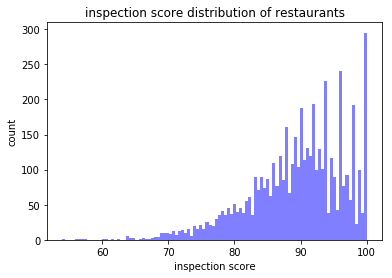

In [9]:
plt.hist(df_restaurants['inspection_score'], bins=100, alpha=0.5, color='b');
plt.xlabel('inspection score');
plt.ylabel('count');
plt.title('inspection score distribution of restaurants');

We can see the inspection score has a distritbution left-skewed distribution. Most scores are pretty high, but this variable has some variation. 

Then, we want to plot the distribution of Airbnb prices. 

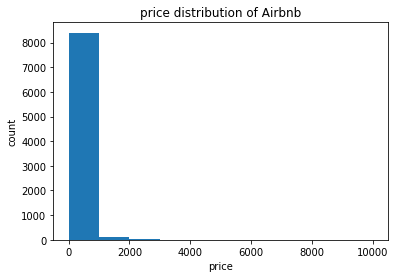

In [10]:
plt.hist(df_airbnb['price']);
plt.xlabel('price');
plt.ylabel('count');
plt.title('price distribution of Airbnb');

There seem to be some outliers with extremely high price. Originally, we expect those prices are not labeled correctly. But after research online, we realized that there is indeed a Airbnb housing that worth 10,000 dollars per night. Although it has been switched to a hotel now, it was a Airbnb housing that people could rent during the time the data was collected (reference: https://fortune.com/2018/09/04/airbnb-expensive-san-francisco-payne-mansion-1881-hotel-restaurant/). But since this extremely big value affects us to see the distribution through visualization plots, we will remove it for now and do another histogram of price distribution. 

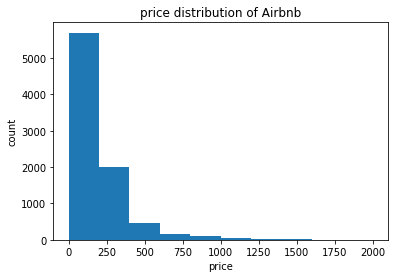

In [11]:
plt.hist(df_airbnb['price'], range =[0, 2000]);
plt.xlabel('price');
plt.ylabel('count');
plt.title('price distribution of Airbnb');

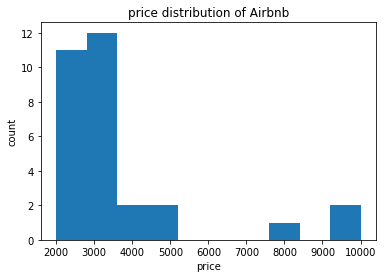

In [12]:
plt.hist(df_airbnb['price'], range =[2000, 10000]);
plt.xlabel('price');
plt.ylabel('count');
plt.title('price distribution of Airbnb');

Now we can see the distribution of prices better. The distribution is right-skewed. Majority of the housing has less than 250 dollars per night. 

Since there are only 30 housing with price more than 2000 dollars. Their price is too high and there are only a few of them. We will treat them as outliers and remove them from the further analysis. 

In [13]:
df_airbnb = df_airbnb[df_airbnb['price'] < 2000];

In [14]:
df_airbnb.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,8.503000e+03,8503.000000,8503.000000,8503.000000,8.503000e+03,8503.000000,8503.000000,8503.000000
mean,2.137561e+07,37.766327,-122.429796,203.608491,1.177681e+04,44.884747,27.849112,152.000353
std,1.283582e+07,0.022828,0.027022,189.102625,1.084461e+06,79.581893,66.127410,136.854142
min,9.580000e+02,37.704480,-122.513060,0.000000,1.000000e+00,0.000000,1.000000,0.000000
25%,9.769670e+06,37.751720,-122.442495,99.000000,2.000000e+00,1.000000,1.000000,12.500000
50%,2.258490e+07,37.769740,-122.424080,150.000000,4.000000e+00,9.000000,2.000000,112.000000
75%,3.270258e+07,37.785575,-122.410535,233.000000,3.000000e+01,52.000000,11.000000,304.000000
max,4.056928e+07,37.828790,-122.368570,1999.000000,1.000000e+08,771.000000,254.000000,365.000000


Since Airbnb dataset has a column that groups housing into differnet neighbourhood. We then want to try plotting the distribution grouped by neighbouhood in different colors. 

Text(0.5, 1.0, 'price distribution of Airbnb')

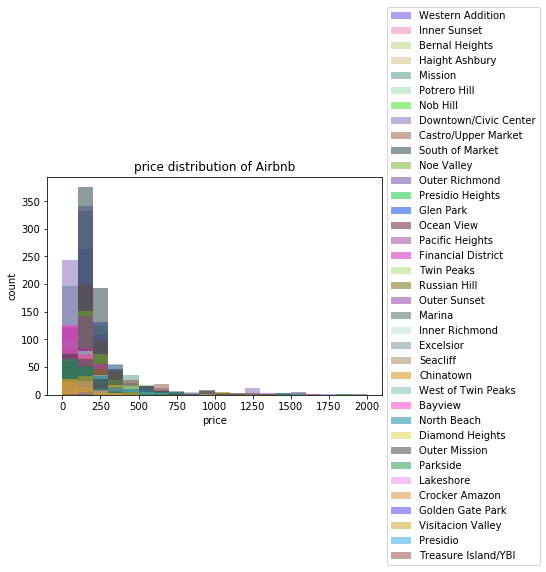

In [15]:
neighbourhood_array = df_airbnb['neighbourhood'].unique()
colors = []
for i in range(len(neighbourhood_array)):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(len(neighbourhood_array)):
    neibourhood_price= df_airbnb.price[df_airbnb['neighbourhood'] == neighbourhood_array[i]]
    plt.hist(neibourhood_price, bins=20, alpha=0.5, label=neighbourhood_array[i], color=colors[i],range = [0,2000])
    plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
ax.set_xlabel('price')
ax.set_ylabel('count')
ax.set_title('price distribution of Airbnb')

As shown above, since there are too many observations with too many neighbourhood groups, the figure looks really messy. We then decide to zoom into a few different ranges of prices. 

Text(0.5, 1.0, 'price distribution of Airbnb')

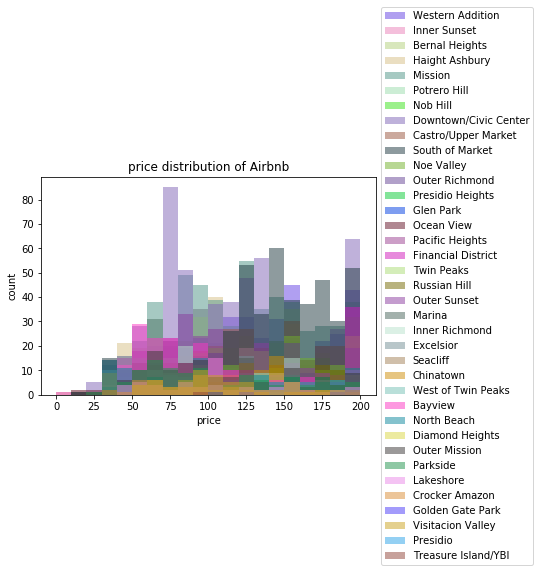

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(len(neighbourhood_array)):
    neibourhood_price= df_airbnb.price[df_airbnb['neighbourhood'] == neighbourhood_array[i]]
    plt.hist(neibourhood_price, bins=20, alpha=0.5, label=neighbourhood_array[i], color=colors[i],range = [0,200])
    plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
ax.set_xlabel('price')
ax.set_ylabel('count')
ax.set_title('price distribution of Airbnb')

Text(0.5, 1.0, 'price distribution of Airbnb')

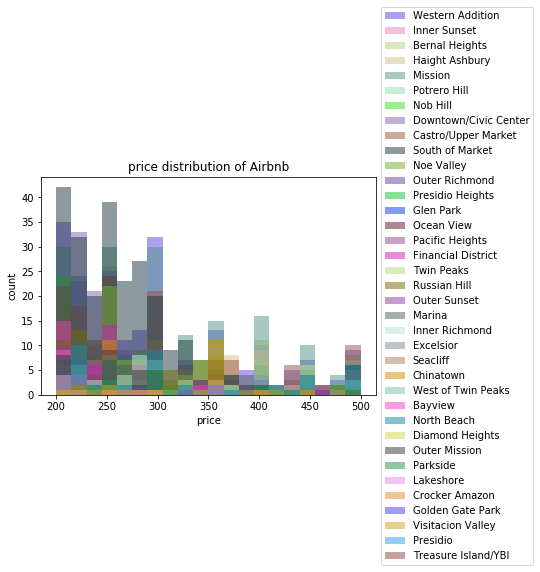

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(len(neighbourhood_array)):
    neibourhood_price= df_airbnb.price[df_airbnb['neighbourhood'] == neighbourhood_array[i]]
    plt.hist(neibourhood_price, bins=20, alpha=0.5, label=neighbourhood_array[i], color=colors[i],range = [200,500])
    plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
ax.set_xlabel('price')
ax.set_ylabel('count')
ax.set_title('price distribution of Airbnb')

Text(0.5, 1.0, 'price distribution of Airbnb')

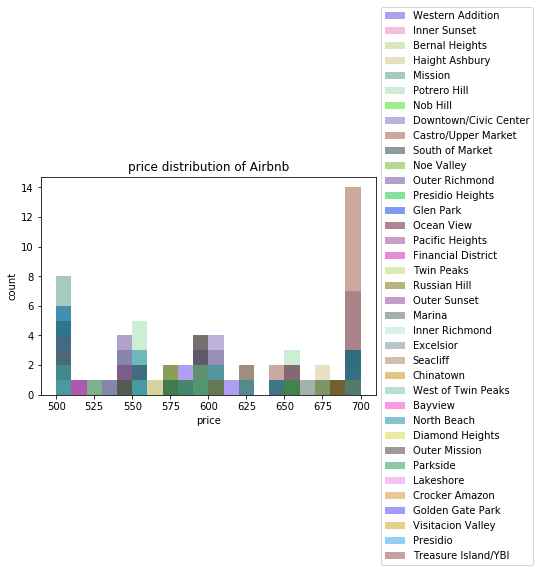

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(len(neighbourhood_array)):
    neibourhood_price= df_airbnb.price[df_airbnb['neighbourhood'] == neighbourhood_array[i]]
    plt.hist(neibourhood_price, bins=20, alpha=0.5, label=neighbourhood_array[i], color=colors[i],range = [500,700])
    plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
ax.set_xlabel('price')
ax.set_ylabel('count')
ax.set_title('price distribution of Airbnb')

Text(0.5, 1.0, 'price distribution of Airbnb')

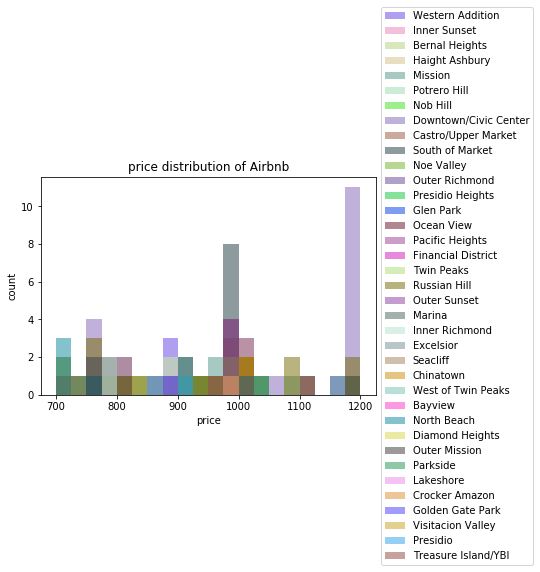

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(len(neighbourhood_array)):
    neibourhood_price= df_airbnb.price[df_airbnb['neighbourhood'] == neighbourhood_array[i]]
    plt.hist(neibourhood_price, bins=20, alpha=0.5, label=neighbourhood_array[i], color=colors[i],range = [700,1200])
    plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
ax.set_xlabel('price')
ax.set_ylabel('count')
ax.set_title('price distribution of Airbnb')

Text(0.5, 1.0, 'price distribution of Airbnb')

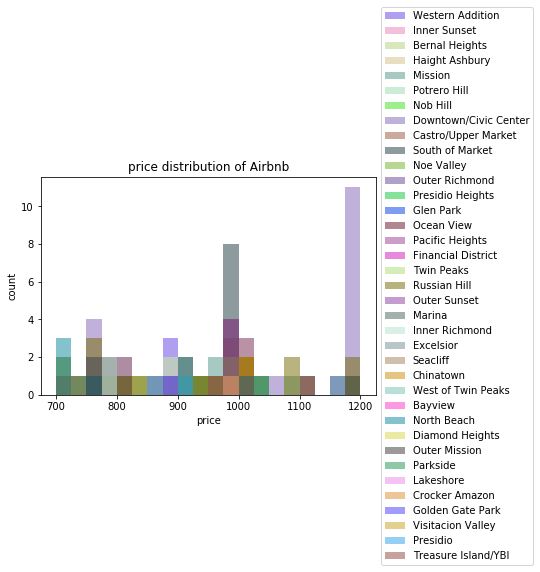

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(len(neighbourhood_array)):
    neibourhood_price= df_airbnb.price[df_airbnb['neighbourhood'] == neighbourhood_array[i]]
    plt.hist(neibourhood_price, bins=20, alpha=0.5, label=neighbourhood_array[i], color=colors[i],range = [700,1200])
    plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
ax.set_xlabel('price')
ax.set_ylabel('count')
ax.set_title('price distribution of Airbnb')

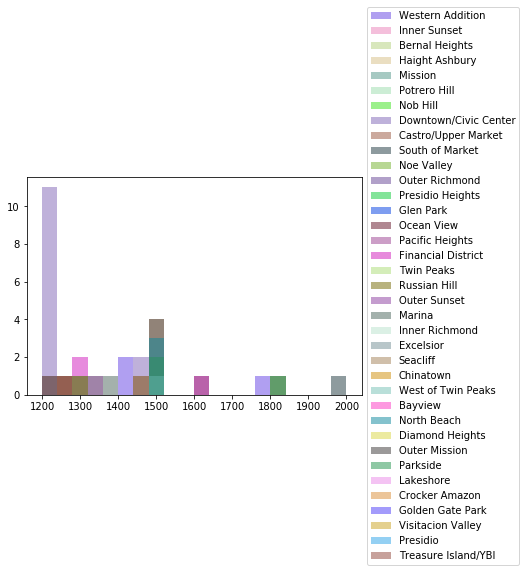

In [21]:
neighbourhood_array = df_airbnb['neighbourhood'].unique()
for i in range(len(neighbourhood_array)):
    neibourhood_price= df_airbnb.price[df_airbnb['neighbourhood'] == neighbourhood_array[i]]
    plt.hist(neibourhood_price, bins=20, alpha=0.5, label=neighbourhood_array[i], color=colors[i],range = [1200,2000])
    plt.legend(loc='center left',bbox_to_anchor=(1,0.5))

From plots above, we can see some neighbourhoods, such as "Downtown/Civic Center", do seem to have more Airbnb housing with higher prices. So neighborhood might be a feature correlated with price. But it might also because these regions just have more Airbnb houses. So then we want to check the distribution of Airbnb at different neighbourhood areas.

In [22]:
df_airbnb['neighbourhood'].value_counts()

Mission                  785
Downtown/Civic Center    760
South of Market          744
Western Addition         628
Castro/Upper Market      470
Haight Ashbury           411
Bernal Heights           411
Noe Valley               336
Nob Hill                 323
Outer Sunset             319
Potrero Hill             249
Inner Richmond           227
Bayview                  226
Financial District       203
Marina                   192
North Beach              190
Excelsior                189
Outer Richmond           188
Russian Hill             188
Outer Mission            180
Inner Sunset             168
Pacific Heights          160
Ocean View               144
West of Twin Peaks       143
Parkside                 141
Chinatown                139
Visitacion Valley         76
Twin Peaks                69
Glen Park                 66
Lakeshore                 59
Crocker Amazon            49
Presidio Heights          23
Seacliff                  22
Diamond Heights           17
Golden Gate Pa

As shown above, different areas do have different amount of housing listed. So we want to plot on map to visualize. First, we will make a heat map to visualize the distribution of Airbnb housing on the map.  

In [23]:
sf_coord = [37.76, -122.45] #Coordination of city of San Francisco
#Set up basic map of San Francisco
sf_map = folium.Map(location=sf_coord,
                    tiles='cartodbpositron',
                    zoom_start=12.5)

Link to the plot below: https://github.com/yuhaimei/COGS108FinalProject/blob/master/heatmap.png

This heatmap sbhows the distribution of Airbnb housing on San Francisco's map. The warmer the color is, the higher the density is. 

In [24]:
HeatMap(data=df_airbnb[['latitude', 'longitude']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(sf_map)
sf_map

As shown above, there is almost Airbnb housing everywhere. Now we want to visualize the density of restaurants near each Airbnb housing on the map. 

In [98]:
sf_coord = [37.76, -122.45] #Coordination of city of San Francisco

#Set up basic map of San Francisco
sf_map_2 = folium.Map(location=sf_coord,
                    tiles='cartodbpositron',
                    zoom_start=12.5)

In [99]:

for lat, lon, num in zip(df_airbnb_with_rest_number['latitude'], df_airbnb_with_rest_number['longitude'], df_airbnb_with_rest_number['rest_num']):
    folium.Circle(
        [lat, lon],
        radius=num,
        color='b',
        fill_color='crimson',
        fill=True,
        ).add_to(sf_map_2)

link to the graph below: https://github.com/yuhaimei/COGS108FinalProject/blob/master/density.png
The plot shows there seem to be more restaurants around Airbnb on north east side of San Francisco 

In [100]:
sf_map_2.save('trying_this.html')
HTML('<iframe src=trying_this.html width=1000 height=700></iframe>')

/Users/yuhaimei/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Now we want to project the price of Airbnb at different neighborhood on the map. Below is what it looks like. Here is the link to the image: https://github.com/yuhaimei/COGS108FinalProject/blob/master/%23%20Choropleth%20Map.png

From this plot, we can see different neighborhood does has different average price. And it seems that the neighborhood with biggeer latitude tend to have higher prices. 

In [28]:
avg_listing = df_airbnb[['neighbourhood','price']].groupby('neighbourhood').mean().reset_index();
san_fran_geo = 'san-francisco.geojson';
sf_coord = [37.76, -122.45] #Coordination of city of San Francisco

#Set up basic map of San Francisco
sf_choro = folium.Map(location=sf_coord,
                    tiles='cartodbpositron',
                    zoom_start=12.5)
folium.Choropleth(
    geo_data=san_fran_geo,
    name='choropleth',
    data=avg_listing,
    columns=['neighbourhood', 'price'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Airbnb Price ($)'
).add_to(sf_choro)

#Save to html
sf_choro.save('choropleth_sf.html')
HTML('<iframe src=choropleth_sf.html width=900 height=700></iframe>')

/Users/yuhaimei/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Now, we also want to know if other factors from the Airbnb dataset can affect the price. Since there are four different room types, we also want to see different room type is correlated with different Airbnb price. For exploratory analysis, we want to first plot the histogram of price colored differently according to room types. 

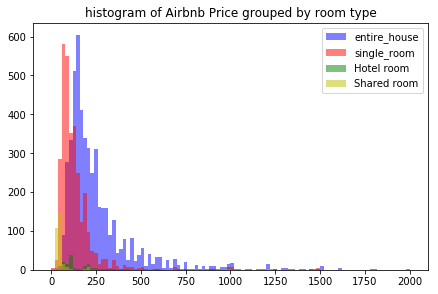

In [29]:
entire_house = df_airbnb.price[df_airbnb['room_type'] == 'Entire home/apt']
single_room = df_airbnb.price[df_airbnb['room_type'] == 'Private room']
hotel_room = df_airbnb.price[df_airbnb['room_type'] == 'Hotel room']
shared_room = df_airbnb.price[df_airbnb['room_type'] == 'Shared room']

plt.hist(entire_house, bins=100, alpha=0.5, label='entire_house', color='b',range = [0,2000])
plt.hist(single_room, bins=100, alpha=0.5, label='single_room', color='r',range = [0,2000])
plt.hist(hotel_room, bins=100, alpha=0.5, label='Hotel room', color='g',range = [0,2000])
plt.hist(shared_room , bins=100, alpha=0.5, label='Shared room', color='y',range = [0,2000])

plt.legend(loc='upper right')
plt.title('histogram of Airbnb Price grouped by room type')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

## Analysis

Now we will divide the dataset of airbnb into four subsets based on the room types we have and see if the density of restaurants nearby is correlated with the price of Airbnb price. 

In [30]:
# add a new column in df_airbnb for number of restuarants nearby each house
df_airbnb = df_airbnb.assign(rest_num = 0)
df_airbnb = df_airbnb.assign(restaurant_avg_score = 0)
df_airbnb = df_airbnb.assign(restaurant_sum_score = 0)

# create 4 df that holds rows that have different room types
df_airbnb_entire = df_airbnb[df_airbnb['room_type'] == 'Entire home/apt']
df_airbnb_hotel = df_airbnb[df_airbnb['room_type'] == 'Hotel room']
df_airbnb_private = df_airbnb[df_airbnb['room_type'] == 'Private room']
df_airbnb_share = df_airbnb[df_airbnb['room_type'] == 'Shared room']

Let's take a look at each subset:

In [31]:
df_airbnb_entire.head()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,rest_num,restaurant_avg_score,restaurant_sum_score
0,958,Western Addition,37.76931,-122.43386,Entire home/apt,170,1,226,1,71,0,0,0
2,5858,Bernal Heights,37.74511,-122.42102,Entire home/apt,235,30,111,1,1,0,0,0
5,8339,Western Addition,37.77525,-122.43637,Entire home/apt,585,5,28,2,365,0,0,0
8,10251,Mission,37.75874,-122.41327,Entire home/apt,199,30,337,1,0,0,0,0
9,10578,Nob Hill,37.79143,-122.41544,Entire home/apt,120,30,18,1,364,0,0,0


In [32]:
df_airbnb_hotel.head()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,rest_num,restaurant_avg_score,restaurant_sum_score
285,459990,Russian Hill,37.80041,-122.41569,Hotel room,148,30,3,26,90,0,0,0
1342,4631873,Marina,37.79786,-122.42571,Hotel room,89,1,155,14,0,0,0,0
1478,5405637,Downtown/Civic Center,37.78559,-122.40874,Hotel room,189,30,7,26,62,0,0,0
1578,6169292,Marina,37.79748,-122.42566,Hotel room,129,1,192,14,22,0,0,0
1681,6883183,Downtown/Civic Center,37.78722,-122.40956,Hotel room,195,2,31,2,3,0,0,0


In [33]:
df_airbnb_private.head()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,rest_num,restaurant_avg_score,restaurant_sum_score
1,3850,Inner Sunset,37.75402,-122.45805,Private room,99,1,175,3,74,0,0,0
3,7918,Haight Ashbury,37.76669,-122.45250,Private room,65,32,18,9,365,0,0,0
4,8142,Haight Ashbury,37.76487,-122.45183,Private room,65,32,8,9,365,0,0,0
6,8739,Mission,37.75919,-122.42237,Private room,139,1,713,2,0,0,0,0
7,9225,Potrero Hill,37.76259,-122.40543,Private room,135,1,523,1,1,0,0,0


In [34]:
df_airbnb_share.head()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,rest_num,restaurant_avg_score,restaurant_sum_score
89,70284,Chinatown,37.79364,-122.40635,Shared room,30,30,15,20,306,0,0,0
90,70753,Financial District,37.79447,-122.40450,Shared room,45,1,395,20,78,0,0,0
94,72444,Financial District,37.79309,-122.40443,Shared room,45,1,400,20,73,0,0,0
115,102951,Chinatown,37.79297,-122.40664,Shared room,30,30,6,20,365,0,0,0
162,206566,Chinatown,37.79507,-122.40498,Shared room,30,30,9,20,365,0,0,0


Since we are going to calculate the number of restuarants around each housing. We need the algorithm to find the distance between two points based on latitude and longtitude. Here we introduce the algorithm:

In [35]:
# approximate radius of earth in km
R = 6373.0

#dlon = lon2 - lon1
#dlat = lat2 - lat1
def cal_dis(dlon, dlat, lat1, lat2):    
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

Now we can use for loop to do the calculations for our dataset.

In [36]:
for index, row in df_airbnb_share.iterrows():
    count = 0
    inspection_score = 0;
    for index_r, row_r in df_restaurants.iterrows():
        lat2 = row_r['business_latitude']
        lat1 = row['latitude']
        dlon = row_r['business_longitude'] - row['longitude']
        dlat = row_r['business_latitude'] - row['latitude']
        distance = cal_dis(dlon, dlat, lat1, lat2)
        if distance <= 3:
            count = count + 1
            inspection_score = inspection_score + row_r['inspection_score']
    df_airbnb_share.at[index,'rest_num'] = count
    df_airbnb_share.at[index,'restaurant_sum_score'] = inspection_score
df_airbnb_share.head()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,rest_num,restaurant_avg_score,restaurant_sum_score
89,70284,Chinatown,37.79364,-122.40635,Shared room,30,30,15,20,306,4,0,323
90,70753,Financial District,37.79447,-122.40450,Shared room,45,1,395,20,78,6,0,508
94,72444,Financial District,37.79309,-122.40443,Shared room,45,1,400,20,73,0,0,0
115,102951,Chinatown,37.79297,-122.40664,Shared room,30,30,6,20,365,2,0,180
162,206566,Chinatown,37.79507,-122.40498,Shared room,30,30,9,20,365,5,0,469


Here is the brief infirmation about the # of restaurants nearby each shared housing

In [37]:
df_airbnb_share['rest_num'].describe()

count    292.000000
mean       1.150685
std        2.108215
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       14.000000
Name: rest_num, dtype: float64

Here is the scatter plot of the column num_rest and the price of the house:

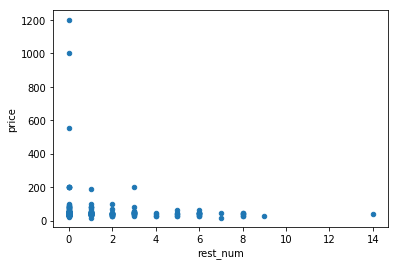

In [38]:
df_airbnb_share.plot.scatter(x="rest_num", y = "price")

Now we can do the linear regression betwwen # of restaurants and the price of the house to see if they have linear relationship

In [39]:
outcome_1, predictors_1 = patsy.dmatrices('price ~ rest_num', df_airbnb_share)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.776
Date:                Thu, 19 Mar 2020   Prob (F-statistic):              0.184
Time:                        14:20:20   Log-Likelihood:                -1745.6
No. Observations:                 292   AIC:                             3495.
Df Residuals:                     290   BIC:                             3502.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.6032      6.391      9.483      0.0

In [40]:
for index, row in df_airbnb_hotel.iterrows():
    count = 0
    inspection_score = 0;
    for index_r, row_r in df_restaurants.iterrows():
        lat2 = row_r['business_latitude']
        lat1 = row['latitude']
        dlon = row_r['business_longitude'] - row['longitude']
        dlat = row_r['business_latitude'] - row['latitude']
        distance = cal_dis(dlon, dlat, lat1, lat2)
        if distance <= 3:
            count = count + 1
            inspection_score = inspection_score + row_r['inspection_score']
    df_airbnb_hotel.at[index,'rest_num'] = count
    df_airbnb_hotel.at[index,'restaurant_sum_score'] = inspection_score
df_airbnb_hotel.head()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,rest_num,restaurant_avg_score,restaurant_sum_score
285,459990,Russian Hill,37.80041,-122.41569,Hotel room,148,30,3,26,90,0,0,0
1342,4631873,Marina,37.79786,-122.42571,Hotel room,89,1,155,14,0,0,0,0
1478,5405637,Downtown/Civic Center,37.78559,-122.40874,Hotel room,189,30,7,26,62,5,0,440
1578,6169292,Marina,37.79748,-122.42566,Hotel room,129,1,192,14,22,0,0,0
1681,6883183,Downtown/Civic Center,37.78722,-122.40956,Hotel room,195,2,31,2,3,5,0,469


In [41]:
df_airbnb_hotel['rest_num'].describe()

count    154.000000
mean       1.902597
std        2.041304
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        8.000000
Name: rest_num, dtype: float64

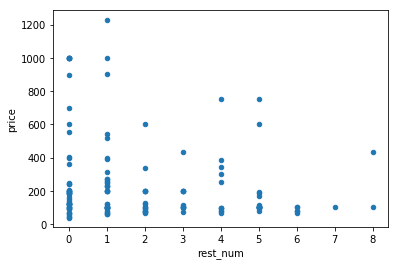

In [42]:
df_airbnb_hotel.plot.scatter(x="rest_num", y = "price")

In [43]:
outcome_2, predictors_2 = patsy.dmatrices('price ~ rest_num', df_airbnb_hotel)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     5.507
Date:                Thu, 19 Mar 2020   Prob (F-statistic):             0.0202
Time:                        14:22:12   Log-Likelihood:                -1064.1
No. Observations:                 154   AIC:                             2132.
Df Residuals:                     152   BIC:                             2138.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    278.4587     26.932     10.339      0.0

In [44]:
for index, row in df_airbnb_private.iterrows():
    count = 0
    inspection_score = 0;
    for index_r, row_r in df_restaurants.iterrows():
        lat2 = row_r['business_latitude']
        lat1 = row['latitude']
        dlon = row_r['business_longitude'] - row['longitude']
        dlat = row_r['business_latitude'] - row['latitude']
        distance = cal_dis(dlon, dlat, lat1, lat2)
        if distance <= 3:
            count = count + 1
            inspection_score = inspection_score + row_r['inspection_score']
    df_airbnb_private.at[index,'rest_num'] = count
    df_airbnb_private.at[index,'restaurant_sum_score'] = inspection_score              
df_airbnb_private.head()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,rest_num,restaurant_avg_score,restaurant_sum_score
1,3850,Inner Sunset,37.75402,-122.45805,Private room,99,1,175,3,74,0,0,0
3,7918,Haight Ashbury,37.76669,-122.45250,Private room,65,32,18,9,365,0,0,0
4,8142,Haight Ashbury,37.76487,-122.45183,Private room,65,32,8,9,365,0,0,0
6,8739,Mission,37.75919,-122.42237,Private room,139,1,713,2,0,0,0,0
7,9225,Potrero Hill,37.76259,-122.40543,Private room,135,1,523,1,1,0,0,0


In [45]:
df_airbnb_private['rest_num'].describe()

count    3112.000000
mean        0.805913
std         1.766029
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        20.000000
Name: rest_num, dtype: float64

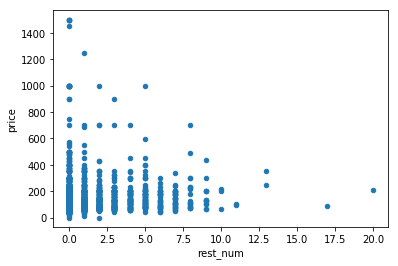

In [46]:
df_airbnb_private.plot.scatter(x="rest_num", y = "price")

In [53]:
outcome_3, predictors_3 = patsy.dmatrices('price ~ rest_num', df_airbnb_private)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     32.68
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           1.19e-08
Time:                        17:05:09   Log-Likelihood:                -19136.
No. Observations:                3112   AIC:                         3.828e+04
Df Residuals:                    3110   BIC:                         3.829e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    127.0097      2.234     56.856      0.0

In [48]:
for index, row in df_airbnb_entire.iterrows():
    count = 0
    inspection_score = 0;
    for index_r, row_r in df_restaurants.iterrows():
        lat2 = row_r['business_latitude']
        lat1 = row['latitude']
        dlon = row_r['business_longitude'] - row['longitude']
        dlat = row_r['business_latitude'] - row['latitude']
        distance = cal_dis(dlon, dlat, lat1, lat2)
        if distance <= 3:
            count = count + 1
            inspection_score = inspection_score + row_r['inspection_score']
    df_airbnb_entire.at[index,'rest_num'] = count
    df_airbnb_entire.at[index,'restaurant_sum_score'] = inspection_score  

df_airbnb_entire.head()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,rest_num,restaurant_avg_score,restaurant_sum_score
0,958,Western Addition,37.76931,-122.43386,Entire home/apt,170,1,226,1,71,0,0,0
2,5858,Bernal Heights,37.74511,-122.42102,Entire home/apt,235,30,111,1,1,0,0,0
5,8339,Western Addition,37.77525,-122.43637,Entire home/apt,585,5,28,2,365,0,0,0
8,10251,Mission,37.75874,-122.41327,Entire home/apt,199,30,337,1,0,0,0,0
9,10578,Nob Hill,37.79143,-122.41544,Entire home/apt,120,30,18,1,364,0,0,0


In [49]:
df_airbnb_entire['rest_num'].describe()

count    4945.000000
mean        0.582406
std         1.456952
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        22.000000
Name: rest_num, dtype: float64

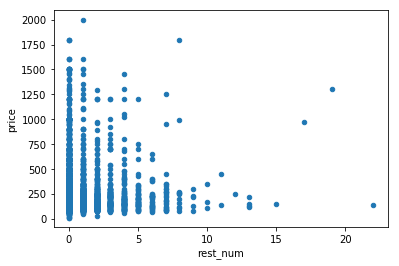

In [50]:
df_airbnb_entire.plot.scatter(x="rest_num", y = "price")

In [51]:
outcome_4, predictors_4 = patsy.dmatrices('price ~ rest_num', df_airbnb_entire)
mod_4 = sm.OLS(outcome_4, predictors_4)
res_4 = mod_4.fit()
print(res_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.307
Date:                Thu, 19 Mar 2020   Prob (F-statistic):              0.253
Time:                        16:06:39   Log-Likelihood:                -33429.
No. Observations:                4945   AIC:                         6.686e+04
Df Residuals:                    4943   BIC:                         6.688e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    254.8184      3.198     79.676      0.0

In [97]:
with_rest = [df_airbnb_entire, df_airbnb_hotel, df_airbnb_private,df_airbnb_share]
df_airbnb_with_rest_number = pd.concat(with_rest)
df_airbnb_with_rest_number.head()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,rest_num,restaurant_avg_score,restaurant_sum_score
0,958,Western Addition,37.76931,-122.43386,Entire home/apt,170,1,226,1,71,0,0,0
2,5858,Bernal Heights,37.74511,-122.42102,Entire home/apt,235,30,111,1,1,0,0,0
5,8339,Western Addition,37.77525,-122.43637,Entire home/apt,585,5,28,2,365,0,0,0
8,10251,Mission,37.75874,-122.41327,Entire home/apt,199,30,337,1,0,0,0,0
9,10578,Nob Hill,37.79143,-122.41544,Entire home/apt,120,30,18,1,364,0,0,0


As shown above, the density of restaurants is slightly correlated with the price for some room types, but not all room types. Also, the correlation is low with bad model performance. So the density of restaurants cannot be a good predictor for price. 

Now we want to go back to our major hypothesis to see if there is a correlation between restaurant inspection score and Airbnb price. 

In order to do this, we want to calculate the average inspection score of restaurants around each Airbnb housing, and then calculate if there is any correlation between the averaged inspection score and the price of Airbnb. First, we want to count only restaurants within about 3 kilometers as nearby restaurants. We do not want this distance to be too big, since that might bring more counfound from the region. 

Now we are trying to find if there is a correlation between restaurant inspection score and Airbnb price. 
First, we will plot a scatter plot with regression line. 

(0.03695387155565529, 0.07609388921773592)


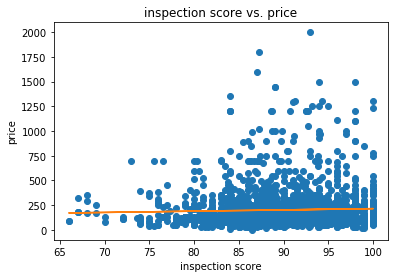

In [102]:
df_airbnb = df_airbnb_with_rest_number;
df_airbnb['restaurant_avg_score'] = df_airbnb['restaurant_sum_score']/df_airbnb['rest_num']
df_airbnb_dropna = df_airbnb.dropna(subset=['restaurant_avg_score'])
#df_airbnb_dropna = df_airbnb.dropna(subset=['price'])
print(stats.pearsonr(df_airbnb_dropna['price'], df_airbnb_dropna['restaurant_avg_score']))
plt.plot(df_airbnb_dropna['restaurant_avg_score'],df_airbnb_dropna['price'],'o')
m, b = np.polyfit(df_airbnb_dropna['restaurant_avg_score'],df_airbnb_dropna['price'], 1)
plt.plot(df_airbnb_dropna['restaurant_avg_score'], m*df_airbnb_dropna['restaurant_avg_score'] + b)
plt.xlabel('inspection score');
plt.ylabel('price');
plt.title('inspection score vs. price');

There is no significant correlation. 

Now we would like to build a linear regression model to predict price with the inspection score of restaurants. We will also run k-fold cross validation to test the performance of this linear regression model. 

In [103]:
#price of restaurant inspection score
df_airbnb_array = df_airbnb_dropna.to_numpy()
price_airbnb = df_airbnb_array[:,6:7] #price
restaurant_inspection = df_airbnb_array[:,10:11] #inspection score
kf = KFold(n_splits=10)
kf.get_n_splits(restaurant_inspection)
for train_index, test_index in kf.split(restaurant_inspection):
    X_train, X_test = restaurant_inspection[train_index], restaurant_inspection[test_index]
    y_train, y_test = price_airbnb[train_index], price_airbnb[test_index]
    model_inspection = LinearRegression().fit(X_train,y_train)
    print(model_inspection.score(X_test, y_test))

-0.03143695868526453
-0.012353048560573619
-0.09746399852629083
-0.05286758323851104
-0.12775913988436383
-0.13918528862235724
-0.024777764176699302
-0.3761237011701881
-0.22798235711836523
-0.012806952167293549


As shown above, inspection score cannot predict Airbnb price, as the score are all negative, which is really bad. 

### Other factors from Airbnb dataset 

Since inspection score is not a good predictor for price and it is not much correlated with Airbnb price, we want to do some further analysis to see what are the real factors that can affect the price. 

First, we want to see if there is any correlation between price and each of the other variables, including latitude, longitude, room_tyep, number_of_reviews, minimum_nights, calculated_host_listings_count, and availabilty_365. We will calculated the correlation coefficient between each and plot the scatter plot with regression line. 

(0.13788051529527284, 2.3090896906848027e-37)


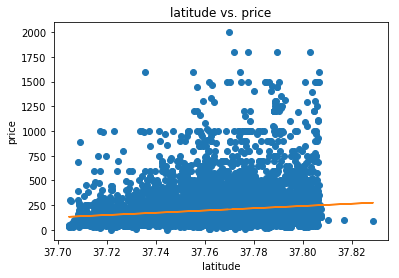

In [104]:
#correlation between price and latitude 
plt.plot(df_airbnb['latitude'],df_airbnb['price'], 'o')
df_airbnb = df_airbnb[df_airbnb['price'].notnull()]
df_airbnb = df_airbnb[df_airbnb['latitude'].notnull()]
print(stats.pearsonr(df_airbnb['price'], df_airbnb['latitude']))
m, b = np.polyfit(df_airbnb['latitude'], df_airbnb['price'], 1)
plt.plot(df_airbnb['latitude'], m*df_airbnb['latitude'] + b)
plt.xlabel('latitude');
plt.ylabel('price');
plt.title('latitude vs. price');

(0.1384656859817531, 1.1748688708830672e-37)


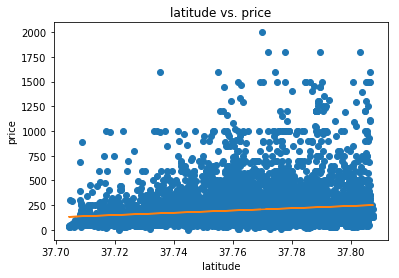

In [107]:
df_airbnb_ = df_airbnb[df_airbnb['latitude']<37.81]
plt.plot(df_airbnb_['latitude'],df_airbnb_['price'], 'o')
df_airbnb_ = df_airbnb_[df_airbnb_['price'].notnull()]
df_airbnb_ = df_airbnb_[df_airbnb_['latitude'].notnull()]
print(stats.pearsonr(df_airbnb_['price'], df_airbnb_['latitude']))
m, b = np.polyfit(df_airbnb_['latitude'], df_airbnb_['price'], 1)
plt.plot(df_airbnb_['latitude'], m*df_airbnb_['latitude'] + b)
plt.xlabel('latitude');
plt.ylabel('price');
plt.title('latitude vs. price');

There is a small positive correlation between latitude and price. The bigger the latitude is, the higher the price tend to be. This is correlated from what we observed above from map visualzation. 

(0.027212768785730736, 0.012092556620128909)


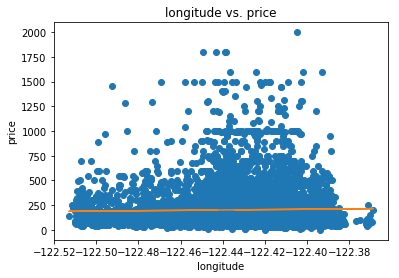

In [108]:
#correlation between price and longitude
print(stats.pearsonr(df_airbnb['price'], df_airbnb['longitude']))
plt.plot(df_airbnb['longitude'],df_airbnb['price'], 'o')
m, b = np.polyfit(df_airbnb['longitude'], df_airbnb['price'], 1)
plt.plot(df_airbnb['longitude'], m*df_airbnb['longitude'] + b)
plt.xlabel('longitude');
plt.ylabel('price');
plt.title('longitude vs. price');

(-0.00778014591428144, 0.4731729902655947)


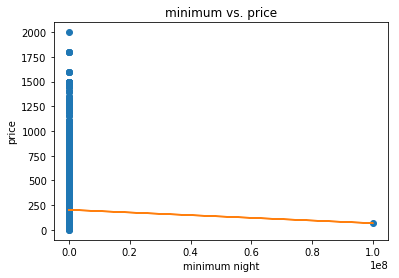

In [109]:
#correlation between price and minuimum nights
print(stats.pearsonr(df_airbnb['price'], df_airbnb['minimum_nights']))
plt.plot(df_airbnb['minimum_nights'],df_airbnb['price'],'o')
m, b = np.polyfit(df_airbnb['minimum_nights'], df_airbnb['price'], 1)
plt.plot(df_airbnb['minimum_nights'], m*df_airbnb['minimum_nights'] + b)
np.sort(df_airbnb['minimum_nights'])
plt.xlabel('minimum night');
plt.ylabel('price');
plt.title('minimum vs. price');

No significant correlation between price and minumun nights.

(-0.11971375124341031, 1.6177801779897953e-28)


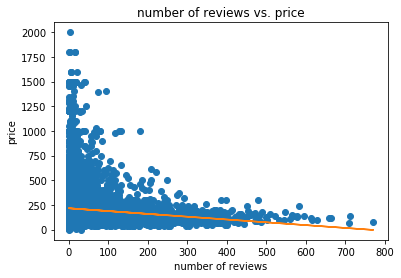

In [110]:
#correlation between price and number of reviews
print(stats.pearsonr(df_airbnb['price'], df_airbnb['number_of_reviews']))
plt.plot(df_airbnb['number_of_reviews'],df_airbnb['price'],'o')
m, b = np.polyfit(df_airbnb['number_of_reviews'], df_airbnb['price'], 1)
plt.plot(df_airbnb['number_of_reviews'], m*df_airbnb['number_of_reviews'] + b)
plt.xlabel('number of reviews');
plt.ylabel('price');
plt.title('number of reviews vs. price');

Bigger number_of_reviews corresponds to lower price. This makes sense because if a housing is too expensive, usually there are less people who choose to live there. 

(-0.04605613384578926, 2.1516341934725934e-05)


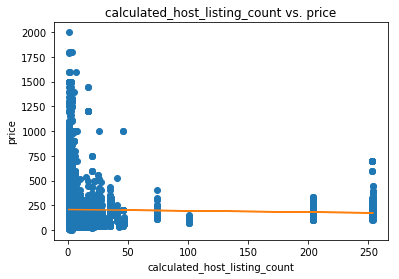

In [111]:
#correlation between price and calculated host listing count 
print(stats.pearsonr(df_airbnb['price'], df_airbnb['calculated_host_listings_count']))
plt.plot(df_airbnb['calculated_host_listings_count'],df_airbnb['price'],'o')
m, b = np.polyfit(df_airbnb['calculated_host_listings_count'], df_airbnb['price'], 1)
plt.plot(df_airbnb['calculated_host_listings_count'], m*df_airbnb['calculated_host_listings_count'] + b)
plt.xlabel('calculated_host_listing_count');
plt.ylabel('price');
plt.title('calculated_host_listing_count vs. price');

There is a small negetive correlation between price and calculated host listing count. 

(-0.08563098460960474, 2.583215721062156e-15)


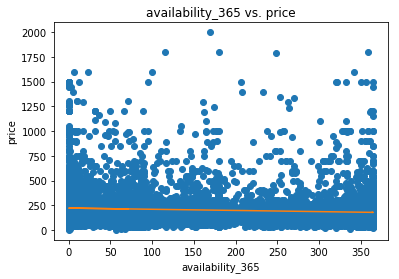

In [112]:
#correlation between price and availability_365 
print(stats.pearsonr(df_airbnb['price'], df_airbnb['availability_365']))
plt.plot(df_airbnb['availability_365'],df_airbnb['price'],'o')
m, b = np.polyfit(df_airbnb['availability_365'], df_airbnb['price'], 1)
plt.plot(df_airbnb['availability_365'], m*df_airbnb['availability_365'] + b)
plt.xlabel('availability_365');
plt.ylabel('price');
plt.title('availability_365 vs. price');

There is a small negetive correlation between price and calculated host listing count. 

Now we want to build a model with all correlated variables from above to predict the price. 

In [114]:
fit = ols('price~ C(neighbourhood) + latitude + longitude + C(room_type) + number_of_reviews + availability_365 + restaurant_avg_score', data=df_airbnb).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     9.570
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           1.99e-52
Time:                        17:47:56   Log-Likelihood:                -15224.
No. Observations:                2305   AIC:                         3.053e+04
Df Residuals:                    2264   BIC:                         3.077e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                 -2.831e+05   9.85e+04     -2.876      0.004   -4.76e+05   -9.01e+04
C(neighbourhood)[T.Bernal Heights]          -23.5499     64.730     -0.364      0.716    -150.485     103.386
C(neighbourhood)[T.Castro/Upper Market]     -33.6064     74.413     -0.452      0.652    -179.531     112.318
C(neighbourhood)[T.Chinatown]               -85.8147     86.313     -0.994      0.320    -255.075      83.445
C(neighbourhood)[T.Crocker Amazon]          -96.1369    111.812     -0.860      0.390    -315.402     123.128
C(neighbourhood)[T.Diamond Heights]        4.123e-11   3.06e-11      1.348      0.178   -1.88e-11    1.01e-10
C(neighbourhood)[T.Downtown/Civic Center]   -74.6036     81.267     -0.918      0.359    -233.970      84.763
C(neighbourhood)[T.Excelsior]               -48.1490     75.033     -0.642      0.521    -195.289      98.991
C(neighbourhood)[T.Financial District]      -41.2711     83.452     -0.495      0.621    -204.921     122.378
C(neighbourhood)[T.Glen Park]               -70.6845     92.787     -0.762      0.446    -252.640     111.271
C(neighbourhood)[T.Golden Gate Park]      -1.525e-10    1.2e-10     -1.272      0.203   -3.87e-10    8.26e-11
C(neighbourhood)[T.Haight Ashbury]         -113.1337     83.364     -1.357      0.175    -276.611      50.343
C(neighbourhood)[T.Inner Richmond]         -117.4445     99.778     -1.177      0.239    -313.111      78.222
C(neighbourhood)[T.Inner Sunset]            -35.4141     95.637     -0.370      0.711    -222.960     152.131
C(neighbourhood)[T.Lakeshore]              -140.3091    131.997     -1.063      0.288    -399.157     118.539
C(neighbourhood)[T.Marina]                 -100.1904    100.843     -0.994      0.321    -297.945      97.564
C(neighbourhood)[T.Mission]                 -40.0705     66.315     -0.604      0.546    -170.114      89.973
C(neighbourhood)[T.Nob Hill]                -84.8211     87.439     -0.970      0.332    -256.290      86.648
C(neighbourhood)[T.Noe Valley]              -46.4465     72.365     -0.642      0.521    -188.356      95.463
C(neighbourhood)[T.North Beach]             -63.2674     94.832     -0.667      0.505    -249.234     122.699
C(neighbourhood)[T.Ocean View]             -118.1892    116.307     -1.016      0.310    -346.269     109.891
C(neighbourhood)[T.Outer Mission]           -33.7063     82.743     -0.407      0.684    -195.967     128.555
C(neighbourhood)[T.Outer Richmond]         -215.9025    112.052     -1.927      0.054    -435.638       3.833
C(neighbourhood)[T.Outer Sunset]           -227.4617    100.781     -2.257      0.024    -425.095     -29.828
C(neighbourhood)[T.Pacific Heights]         -33.4292     96.786     -0.345      0.730    -223.228     156.370
C(n

As shown above, the model performs really bad. These factors together are still not enough to predict price, either, at least with linear regression.  

In [117]:
fit = ols('price~ C(neighbourhood) + latitude + longitude + C(room_type) + number_of_reviews + availability_365 + restaurant_avg_score+restaurant_avg_score', data=df_airbnb).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     9.570
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           1.99e-52
Time:                        17:49:04   Log-Likelihood:                -15224.
No. Observations:                2305   AIC:                         3.053e+04
Df Residuals:                    2264   BIC:                         3.077e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                 -2.831e+05   9.85e+04     -2.876      0.004   -4.76e+05   -9.01e+04
C(neighbourhood)[T.Bernal Heights]          -23.5499     64.730     -0.364      0.716    -150.485     103.386
C(neighbourhood)[T.Castro/Upper Market]     -33.6064     74.413     -0.452      0.652    -179.531     112.318
C(neighbourhood)[T.Chinatown]               -85.8147     86.313     -0.994      0.320    -255.075      83.445
C(neighbourhood)[T.Crocker Amazon]          -96.1369    111.812     -0.860      0.390    -315.402     123.128
C(neighbourhood)[T.Diamond Heights]        4.123e-11   3.06e-11      1.348      0.178   -1.88e-11    1.01e-10
C(neighbourhood)[T.Downtown/Civic Center]   -74.6036     81.267     -0.918      0.359    -233.970      84.763
C(neighbourhood)[T.Excelsior]               -48.1490     75.033     -0.642      0.521    -195.289      98.991
C(neighbourhood)[T.Financial District]      -41.2711     83.452     -0.495      0.621    -204.921     122.378
C(neighbourhood)[T.Glen Park]               -70.6845     92.787     -0.762      0.446    -252.640     111.271
C(neighbourhood)[T.Golden Gate Park]      -1.525e-10    1.2e-10     -1.272      0.203   -3.87e-10    8.26e-11
C(neighbourhood)[T.Haight Ashbury]         -113.1337     83.364     -1.357      0.175    -276.611      50.343
C(neighbourhood)[T.Inner Richmond]         -117.4445     99.778     -1.177      0.239    -313.111      78.222
C(neighbourhood)[T.Inner Sunset]            -35.4141     95.637     -0.370      0.711    -222.960     152.131
C(neighbourhood)[T.Lakeshore]              -140.3091    131.997     -1.063      0.288    -399.157     118.539
C(neighbourhood)[T.Marina]                 -100.1904    100.843     -0.994      0.321    -297.945      97.564
C(neighbourhood)[T.Mission]                 -40.0705     66.315     -0.604      0.546    -170.114      89.973
C(neighbourhood)[T.Nob Hill]                -84.8211     87.439     -0.970      0.332    -256.290      86.648
C(neighbourhood)[T.Noe Valley]              -46.4465     72.365     -0.642      0.521    -188.356      95.463
C(neighbourhood)[T.North Beach]             -63.2674     94.832     -0.667      0.505    -249.234     122.699
C(neighbourhood)[T.Ocean View]             -118.1892    116.307     -1.016      0.310    -346.269     109.891
C(neighbourhood)[T.Outer Mission]           -33.7063     82.743     -0.407      0.684    -195.967     128.555
C(neighbourhood)[T.Outer Richmond]         -215.9025    112.052     -1.927      0.054    -435.638       3.833
C(neighbourhood)[T.Outer Sunset]           -227.4617    100.781     -2.257      0.024    -425.095     -29.828
C(neighbourhood)[T.Pacific Heights]         -33.4292     96.786     -0.345      0.730    -223.228     156.370
C(n

If we add inspection score as a predictor, the model does not improve at all. 

# Ethics & Privacy

Question: 

We are trying to find the factors correlated with price. If there are some significant correlation, we can use the information to help consumers to judge if a price is reasonable. If there are no correlation that we could find, it suggests further analysis is needed. So the question we are asking would only be beneficial but not harming anyone. 

SF Airbnb Listings Data Set: 

Permission to use the San Francisco data set was gained by sourcing Airbnb information that has been officially released to the public and is covered under “fair use” for public analysis and discussion. There are no direct privacy concerns regarding this dataset due to the data being cleaned such that all identifying information of the Airbnb host and guest is removed (e.g. name, age) and keeps Airbnb users anonymous. However, there is an indirect privacy concern as a result of the chosen dataset revealing the official location of an Airbnb listing. In some cases, this address could potentially be the stated Airbnb host’s home address as well but no direct correlation can directly be found. But since we are not using any personal information and we tried to remove as much of them as possible before analysis, there are no direct ethical concerns with the way that we decided to use the Airbnb dataset. 

SF CA Restaurant Scores Data Set: 

Permission to use this data set was gained by the city of San Francisco itself allowing public use based on website information being “public record that may be subject to inspection and copying by the public, unless an exemption in law exists.” There are no privacy concerns regarding this dataset revealing a SF restaurant’s inspection score and violation (if applicable) due to law already making it mandatory for a restaurant to post their inspection grade card on their front window. In other words, that information is public record already, just like the SF Airbnb Listings data set. There are no ethical concerns with utilizing this dataset to figure out if an Airbnb price is affected by it since we are not using personal information and we removed them before analysis. Our analysis regarding this dataset  is not putting anyone at harm.


Bias in data: 

We removed a few Airbnb housing with extremely high prices. But they are only less than 0.3% percent of the whole dataset and they have extremely high value which makes the distribution skewed too much. Also, they usually served as a place for noble events, people usually would not reserve them. So removing them would not add much bias. 
Some potential bias is that we are only focusing on San Francisco. If we have more time and resources, it would be better to do similar analysis for more cities or even with larger areas, like states.  

Analysis: 

For the purpose of this course, we only tried linear regression. There are many other anlaysis approaches, such as PCA, factor analysis, etc. It might be better if we can try more models. But even with this current analysis, we can see these factors discussed above are indeed not enough to predict price well. 
If we have more time, we should also try different distances-besides 3 kilometers, we should also try to look for effects if the distance is 2km, 1km, 4km, or even 5km to explore more. This is something we would like to improve if we continue to do further analysis. 

Post-analysis:

Since we are not publishing this result anywhere, there are not really post-analysis ethical issues. But after analysis, we would hope Airbnb would release more data information, like how big a room is, etc. on the official website. We do not think that would violate any ethical issues. 





# Conclusion & Discussion

After analysis, we found that there is no significant correlation between restaurant inspection scores and Airbnb prices in San Francisco. There are other factors that are correlated with the price, such as the latitude of the Airbnb, but the correlation coefficient is also small.

It is nearly impossible to predict the price of an Airbnb housing with the dataset that was officially provided by Airbnb themselves. This result is primarily due to there being many other factors that can affect the price. For example, there is a possibility of there being a better surrounding environment (i.e. more tourist attractions) to visit around some of the Airbnb listings, which can positively impact the final price. Or another factor can be the varying room types and total rooms that a listing can provide. Or sometimes, the price might just be set according to the owner’s own set of subjective factors (e.g. cost of rent, total profit desired, demand in area). 

As a result, accurately predicting the final price of an Airbnb listing is a complex task. Without data that covers all major factors, both subjective and objective, that go into setting the final price of an Airbnb listing, we are limited on accurately analyzing and assessing Airbnb pricing in general.

As for our shortness, if we have more time, we would want to try more analysis approaches with more different cities and more other factors if possible. But analysis always have some limitations; hopefully, those will be done in the future. 

Our project will show the society that there are many factors that people need to consider which can affect price of Airbnb, and sometimes these factors might not be clearly labeled on website, and they might even be subjective. People should be more careful when they choose Airbnb, and it would be better if Airbnb officials can release more features of the houses on their official dataset website. Although we did not find significantly big correlation, our analysis can serve as a steping-stone for future analysis, and it can provide some insights on what facotrs are more correlated. 

# Team Contributions

Some might focus more on analysis, and some focused more on writings a little bit, but we all contributed equally through this project.